In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("gym.csv")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df

,Name,Date,Type,Primary Muscle,Sets,Reps,Weight (lbs),Notes
0,Dumbell Curls,3/20/2023,Pull,Biceps,3,10,20,NaN
1,Overhead Dumbell Raises,3/20/2023,Push,Triceps,3,10,20,NaN
2,Dumbell Shoulder Press,3/20/2023,Push,Shoulders,3,10,25,NaN
3,Dumbell Bench Press,3/20/2023,Push,Chest,3,10,30,NaN
4,Dumbell Rows,3/20/2023,Pull,Lats,3,10,30,NaN
...,...,...,...,...,...,...,...,...
656,Preacher Curls,12/27/2023,Pull,Biceps,4,10,45,NaN
657,Hammerhead Curls,12/27/2023,Pull,Biceps,4,8,35,NaN
658,Overhead Tricep Raises,12/27/2023,Push,Triceps,4,10,35,NaN
659,Incline Supinated Curls,12/27/2023,Pull,Biceps,4,10,25,NaN


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')

In [5]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
mY = []
for x in range(len(df['month'])):
    mY.append(str(df['month'][x]) + '/' + str(df['year'][x]))
df['mY'] = mY

In [6]:
bodyweight = 145
for x in range(len(df['Weight (lbs)'])):
    if df['Weight (lbs)'][x] == 'bodyweight' or df['Weight (lbs)'][x] == 'Bodyweight':
        df['Weight (lbs)'][x] = bodyweight

In [18]:
df['Weight (lbs)'].value_counts()

Weight (lbs)
145      41
25       39
50       38
100      36
115      32
         ..
145       1
37.5      1
17        1
42.5      1
18.75     1
Name: count, Length: 61, dtype: int64

In [7]:
for x in range(len(df)):
    df['Weight (lbs)'][x] = str(df['Weight (lbs)'][x])

In [10]:
df['Weight (lbs)'] = pd.to_numeric(df['Weight (lbs)'])

In [11]:
df.dtypes

Name                      object
Date              datetime64[ns]
Type                      object
Primary Muscle            object
Sets                       int64
Reps                       int64
Weight (lbs)             float64
Notes                     object
month                      int32
year                       int32
mY                        object
dtype: object

In [12]:
for x in range(len(df)):
    df['Weight (lbs)'][x] = int(df['Weight (lbs)'][x])

In [31]:
typeCount = df['Type'].value_counts()
typeCount

Type
Push    230
Pull    185
Legs    126
Core    120
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

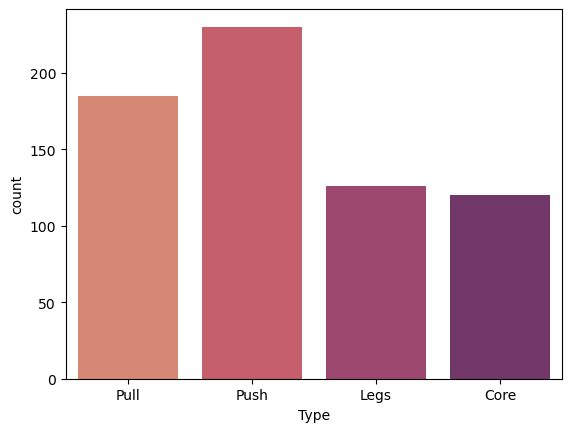

In [32]:
sns.countplot(data = df, x ="Type", palette = 'flare')

In [33]:
df.dtypes

Name                      object
Date              datetime64[ns]
Type                      object
Primary Muscle            object
Sets                       int64
Reps                       int64
Weight (lbs)              object
Notes                     object
month                      int32
year                       int32
mY                        object
dtype: object

<Axes: xlabel='Type', ylabel='count'>

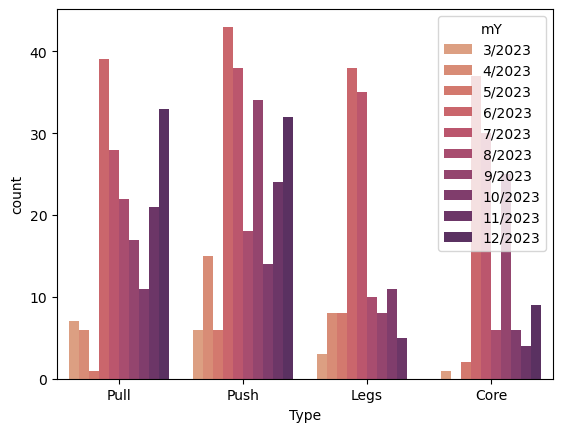

In [34]:
sns.countplot(data = df, x ="Type", hue = "mY", palette = 'flare')

In [35]:
df

,Name,Date,Type,Primary Muscle,Sets,Reps,Weight (lbs),Notes,month,year,mY
0,Dumbell Curls,2023-03-20,Pull,Biceps,3,10,20,NaN,3,2023,3/2023
1,Overhead Dumbell Raises,2023-03-20,Push,Triceps,3,10,20,NaN,3,2023,3/2023
2,Dumbell Shoulder Press,2023-03-20,Push,Shoulders,3,10,25,NaN,3,2023,3/2023
3,Dumbell Bench Press,2023-03-20,Push,Chest,3,10,30,NaN,3,2023,3/2023
4,Dumbell Rows,2023-03-20,Pull,Lats,3,10,30,NaN,3,2023,3/2023
...,...,...,...,...,...,...,...,...,...,...,...
656,Preacher Curls,2023-12-27,Pull,Biceps,4,10,45,NaN,12,2023,12/2023
657,Hammerhead Curls,2023-12-27,Pull,Biceps,4,8,35,NaN,12,2023,12/2023
658,Overhead Tricep Raises,2023-12-27,Push,Triceps,4,10,35,NaN,12,2023,12/2023
659,Incline Supinated Curls,2023-12-27,Pull,Biceps,4,10,25,NaN,12,2023,12/2023


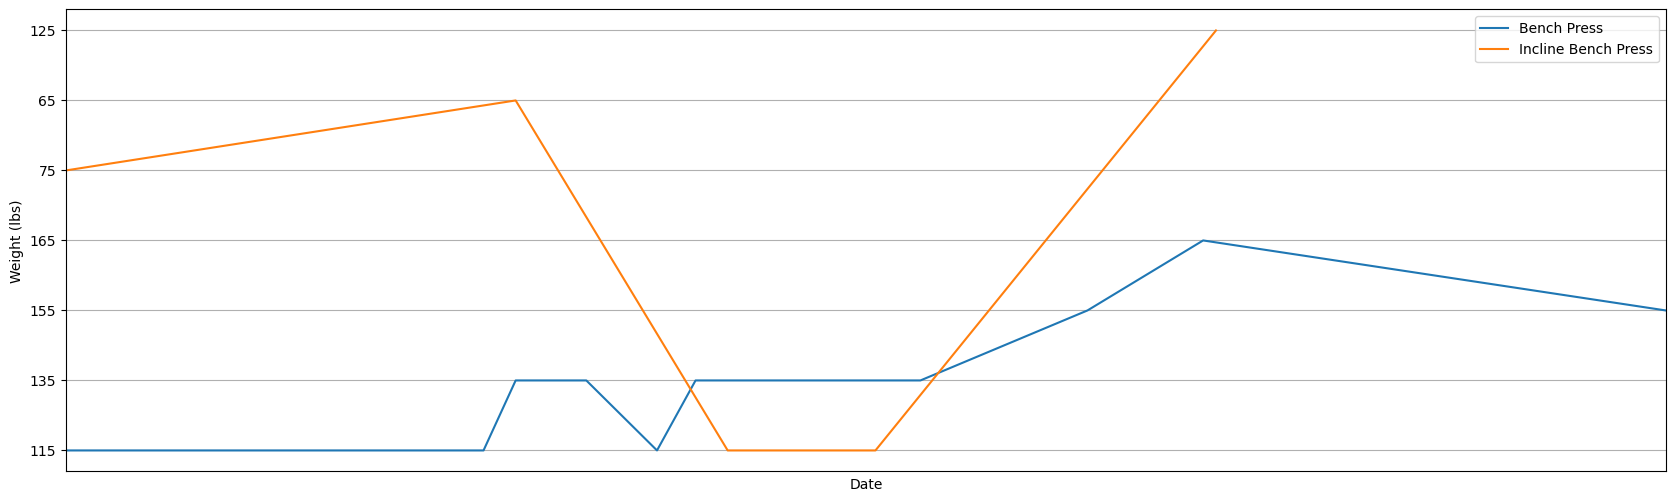

In [36]:
plt.figure(figsize = (12,6))
exerciseName = "Bench Press"
exercise = df[df['Name'] == "Bench Press"]
plot =sns.lineplot(data = exercise, x = 'Date', y = 'Weight (lbs)', label = exerciseName)
exercise = df[df['Name'] == "Incline Bench Press"]
exerciseName = "Incline Bench Press"
plot =sns.lineplot(data = exercise, x = 'Date', y = 'Weight (lbs)', label = exerciseName)
plot.invert_yaxis()
N=20
plt.xticks(range(N)) # add loads of ticks
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

#plt.savefig("exercises"+".png")
plt.show()

In [38]:
df.groupby(by = 'Date')
df

,Name,Date,Type,Primary Muscle,Sets,Reps,Weight (lbs),Notes,month,year,mY
0,Dumbell Curls,2023-03-20,Pull,Biceps,3,10,20,NaN,3,2023,3/2023
1,Overhead Dumbell Raises,2023-03-20,Push,Triceps,3,10,20,NaN,3,2023,3/2023
2,Dumbell Shoulder Press,2023-03-20,Push,Shoulders,3,10,25,NaN,3,2023,3/2023
3,Dumbell Bench Press,2023-03-20,Push,Chest,3,10,30,NaN,3,2023,3/2023
4,Dumbell Rows,2023-03-20,Pull,Lats,3,10,30,NaN,3,2023,3/2023
...,...,...,...,...,...,...,...,...,...,...,...
656,Preacher Curls,2023-12-27,Pull,Biceps,4,10,45,NaN,12,2023,12/2023
657,Hammerhead Curls,2023-12-27,Pull,Biceps,4,8,35,NaN,12,2023,12/2023
658,Overhead Tricep Raises,2023-12-27,Push,Triceps,4,10,35,NaN,12,2023,12/2023
659,Incline Supinated Curls,2023-12-27,Pull,Biceps,4,10,25,NaN,12,2023,12/2023


In [39]:
df['Weight (lbs)'].unique()

array(['20', '25', '30', '60', '40', '15', 'Bodyweight', '80', '90', '45',
       '115', '75', '27.5', '130', '110', '85', 145, '70', '175', '135',
       '185', '210', '150', '100', '50', '55', '155', '125', '160', '170',
       '35', '120', '140', '7', '9', '5', '6', '230', '4', '95', '105',
       '8', '190', '65', '10', '33', '145', '11', '12', '205', '250',
       '22.5', '270', '225', '200', '165', '17.5', '37.5', '17', '42.5',
       '18.75', '32.5'], dtype=object)

In [40]:
df['Type'].unique()

array(['Pull', 'Push', 'Legs', 'Core'], dtype=object)

In [44]:
for x in range(len(df['Weight (lbs)'])):
    if df['Weight (lbs)'][x] == 'bodyweight' or df['Weight (lbs)'][x] == 'Bodyweight':
        df['Weight (lbs)'][x] = 145

In [13]:
push = df[df['Type'] == 'Push']
push.dtypes

Name                      object
Date              datetime64[ns]
Type                      object
Primary Muscle            object
Sets                       int64
Reps                       int64
Weight (lbs)             float64
Notes                     object
month                      int32
year                       int32
mY                        object
dtype: object

In [14]:


push = push.sort_values(by = 'Weight (lbs)', ascending = True)
push

,Name,Date,Type,Primary Muscle,Sets,Reps,Weight (lbs),Notes,month,year,mY
451,Tricep Push Downs,2023-09-19,Push,Triceps,3,8,8.0,nm,9,2023,9/2023
56,Cable Flys,2023-05-26,Push,Delts,4,10,15.0,NaN,5,2023,5/2023
621,Dumbell Lat Raises,2023-12-17,Push,Shoulders,4,10,15.0,NaN,12,2023,12/2023
622,Front Lat Raises,2023-12-17,Push,Shoulders,4,10,15.0,NaN,12,2023,12/2023
575,Tricep Katanas,2023-11-26,Push,Triceps,4,6,15.0,NaN,11,2023,11/2023
...,...,...,...,...,...,...,...,...,...,...,...
601,Bench Press,2023-12-09,Push,Chest,4,8,155.0,NaN,12,2023,12/2023
449,Bench press,2023-09-19,Push,Chest,3,6,155.0,NaN,9,2023,9/2023
394,Bench press,2023-08-23,Push,Chest,4,4,155.0,NaN,8,2023,8/2023
476,Bench Press,2023-09-28,Push,Chest,4,4,165.0,NaN,9,2023,9/2023


In [24]:
df

,Name,Date,Type,Primary Muscle,Sets,Reps,Weight (lbs),Notes,month,year,mY
0,Dumbell Curls,2023-03-20,Pull,Biceps,3,10,20.0,NaN,3,2023,3/2023
1,Overhead Dumbell Raises,2023-03-20,Push,Triceps,3,10,20.0,NaN,3,2023,3/2023
2,Dumbell Shoulder Press,2023-03-20,Push,Shoulders,3,10,25.0,NaN,3,2023,3/2023
3,Dumbell Bench Press,2023-03-20,Push,Chest,3,10,30.0,NaN,3,2023,3/2023
4,Dumbell Rows,2023-03-20,Pull,Lats,3,10,30.0,NaN,3,2023,3/2023
...,...,...,...,...,...,...,...,...,...,...,...
656,Preacher Curls,2023-12-27,Pull,Biceps,4,10,45.0,NaN,12,2023,12/2023
657,Hammerhead Curls,2023-12-27,Pull,Biceps,4,8,35.0,NaN,12,2023,12/2023
658,Overhead Tricep Raises,2023-12-27,Push,Triceps,4,10,35.0,NaN,12,2023,12/2023
659,Incline Supinated Curls,2023-12-27,Pull,Biceps,4,10,25.0,NaN,12,2023,12/2023


In [36]:
rateOfChange = []
for x in range(len(df['Name'].unique())):
    exerciseName = df['Name'].unique()[x]
    diff = []
    stack = []
    diff.append(1)
    for y in range(len(df)):
        if df['Name'][y] == exerciseName:
            stack.append(df['Weight (lbs)'][y])
            if len(stack) > 1:
                val = (stack[len(stack)-1]) - (stack[len(stack)-2])
                diff.append(val)
    sum = 0
    for y in range(len(diff)):
        sum+= diff[y]
    rateOfChange.append(sum / len(diff))


In [37]:

rateOfChangeSeries = pd.Series(rateOfChange, df['Name'].unique())

In [40]:
print(rateOfChangeSeries.keys())

Index(['Dumbell Curls', 'Overhead Dumbell Raises', 'Dumbell Shoulder Press',
       'Dumbell Bench Press', 'Dumbell Rows', 'Dumbell Squats',
       'Dumbell Deadlifts', 'Dumbell Calf Raises', 'Dumbell Twists',
       'Pull Ups', 'Lateral Rows', 'Lat Pull Downs', 'Tricep Push Downs',
       'Dumbell Lateral Raises', 'Bench Press', 'Incline Bench Press', 'Dips',
       'Shoulder Press', 'Flys', 'Reverse Flys', 'Squats', 'Hip Thrusts',
       'Hip Abductions', 'Reverse Hip Abductions', 'Leg Press', 'Calf Raises',
       'Leg Extensions', 'Leg Curls', 'Chest Press', 'Shoulder press',
       'Lat Raises', 'Tricep Pushes', 'Cable Flys', 'Tricep Kick Backs',
       'Dumbell Lunges', 'Cable Crunches', 'Good Mornings',
       'Incline Bench press', 'Decline Bench Press', 'Overhead Tricep Raises',
       'Preacher Curls', 'Incline Rows', 'Underhand Rows', 'Leg Raises',
       'Cable Twists', 'Ab Crunches', 'Back Pushes', 'Oblique Crunches',
       'Incline Situps', 'Back Raises', 'Glute Master',

In [42]:
print(rateOfChangeSeries.values)

[ 1.22222222e+00  1.05000000e+01  3.00000000e+00  5.33333333e+00
  1.00000000e+00  5.50000000e+00  1.00000000e+00  1.00000000e+00
  8.00000000e+00  3.57142857e-02 -1.46153846e+00  2.20000000e+00
  6.40000000e-01  1.00000000e+00  3.41666667e+00  1.02000000e+01
 -7.77777778e-01  1.02000000e+01 -2.00000000e+00  1.82352941e+00
  2.68421053e+00 -4.50000000e+00  1.44444444e+00  1.23076923e+00
  2.62500000e+00  1.40000000e+00 -2.23076923e+00  1.93750000e+00
  1.00000000e+00 -2.40000000e+00 -2.78571429e+00 -1.60000000e+01
  3.00000000e+00  1.00000000e+00  2.28571429e+00  1.00000000e+00
  8.57142857e-01 -7.50000000e-01 -3.16666667e+00  6.00000000e-01
 -1.88888889e+00  3.87500000e+00  9.09090909e-02  5.26315789e-02
  3.92307692e+00  1.81250000e+00  1.26428571e+01  5.25000000e+00
  6.11111111e-01  5.78947368e-01  8.00000000e-01  8.20000000e+00
  1.90909091e+00  1.00000000e+00  1.00000000e+00  3.33333333e-01
 -9.50000000e+00  5.33333333e+00  1.00000000e+00  1.00000000e+00
  1.05000000e+01  1.00000

In [58]:
from datetime import datetime
currentMonth = datetime.now().month
print(currentMonth)

12


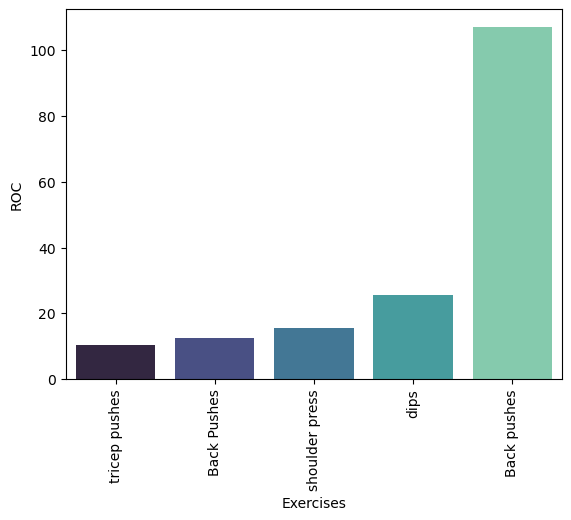

In [81]:
sortedROC = sorted(rateOfChangeSeries.items(), key=lambda x:x[1])
rocDF = pd.DataFrame(sortedROC)
rocDF['Exercises'] = rocDF[0]
rocDF['ROC'] = rocDF[1]
#rocDF
#rocDF.plot.bar()
top5 = rocDF.tail()
bottom5 = rocDF.head()
#sns.barplot(data = bottom5, x = 'Exercises', y = 'ROC')
sns.barplot(data = top5, x = 'Exercises', y = 'ROC', palette = 'mako')
plt.xticks(rotation = 'vertical')
plt.show()

In [86]:
currentMonth = datetime.now().month
recentMonths = []
for i in range(3):
    recentMonths.append((currentMonth - i)%13)
recentMonths

[12, 11, 10]

<Axes: >

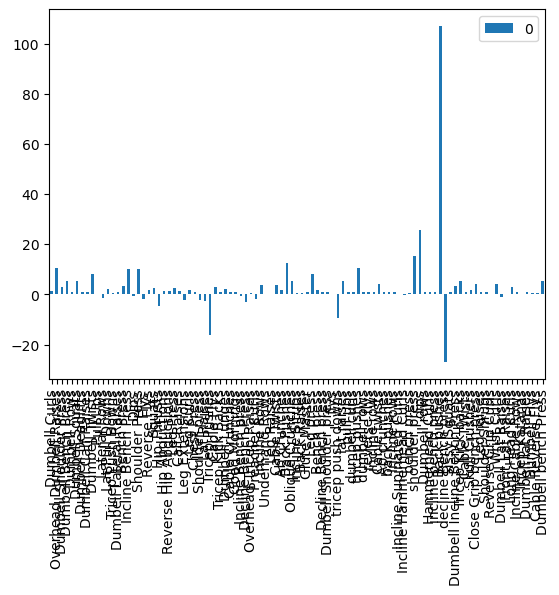

In [51]:
rocDF = pd.DataFrame(rateOfChangeSeries)
rocDF.plot.bar()

In [54]:
bench = df[df['Name'] == 'Bench Press']
bench = bench.reset_index()
bench

,index,Name,Date,Type,Primary Muscle,Sets,Reps,Weight (lbs),Notes,month,year,mY
0,17,Bench Press,2023-04-04,Push,Chest,2,8,115.0,NaN,4,2023,4/2023
1,18,Bench Press,2023-04-04,Push,Chest,2,6,115.0,NaN,4,2023,4/2023
2,93,Bench Press,2023-06-08,Push,Chest,4,6,115.0,NaN,6,2023,6/2023
3,122,Bench Press,2023-06-13,Push,Chest,4,6,135.0,NaN,6,2023,6/2023
4,173,Bench Press,2023-06-24,Push,Chest,4,6,135.0,NaN,6,2023,6/2023
5,232,Bench Press,2023-07-05,Push,Chest,4,8,115.0,NaN,7,2023,7/2023
6,261,Bench Press,2023-07-11,Push,Chest,4,4,135.0,NaN,7,2023,7/2023
7,290,Bench Press,2023-07-16,Push,Chest,4,6,135.0,NaN,7,2023,7/2023
8,381,Bench Press,2023-08-15,Push,Chest,4,8,135.0,NaN,8,2023,8/2023
9,431,Bench Press,2023-09-10,Push,Chest,4,6,155.0,NaN,9,2023,9/2023
